# Анализ финансирования и приобретений стартапов

## Введение

### Цели и задачи проекта

**Цель проекта** - подготовить и исследовать данные о стартапах, чтобы выявить закономерности в финансировании и покупках компаний, оценить качество данных и дать рекомендации для принятия инвестиционных решений.

**Задачи:**

- Провести загрузку и предобработку данных (проверка названий, типов, пропусков).
- Определить ключевые столбцы для объединения таблиц.
- Оценить полноту информации о сотрудниках и их образовании.
- Проанализировать динамику и типичные размеры раундов финансирования.
- Выявить и интерпретировать аномалии (например, покупки за 0 или 1 доллар).
- Сравнить цены стартапов в разных категориях и в зависимости от числа раундов.
- Построить выводы и рекомендации по данным для бизнеса.

### Описание данных

Для анализа будут использованы данные из датасетов `acquisition`, `company_and_rounds`, `people`, `education` и `degrees`, а также датасеты `fund` и `investment` информация из которых предположительно не будет зайдествована в анализе, однако данные датасетов связаны с исследуемыми и имеют справочный характер.

- `acquisition.csv` —  информация о покупках одними компаниями других компаний.
- `company_and_rounds.csv` — информация о компаниях и раундах финансирования.
- `people.csv` — информация о сотрудниках.
- `education.csv` — информация об образовании сотрудника.
- `degrees.csv` — информация о типе образования сотрудника.
- `fund.csv` — информация о фондах.
- `investment.csv` — информация о раундах инвестирования.

### Описание датасета `acquisition`
- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.

### Описание датасета `company_and_rounds`
- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата основания компании.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding rounds` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.

### Описание датасета `people`
- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.

### Описание датасета `education`
- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.

### Описание датасета `degrees`
- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.

### Описание датасета `fund`
- `id` — идентификатор фонда.
- `name` — название фонда.
- `category_code` — категория области деятельности компании.
- `founded_at` — дата создания фонда.
- `domain` — сайт фонда.
- `network_username` — ник фонда в сети.
- `country_code` — код страны фонда.
- `investment_rounds` — число инвестиционных раундов.
- `invested_companies` — число профинансированных компаний.
- `milestones` — вехи финансирования.

### Описание датасета `investment`
- `id` — идентификатор этапа инвестирования.
- `funding_round_id` — идентификатор раунда инвестирования.
- `company_id` — идентификатор компании.
- `funding_round_type` — тип финансирования.
- `fund_id` — идентификатор фонда.

## Знакомство с данными: загрузка и первичная предобработка

### Вывод общей информации для принятия решений о первичной предобработке

In [1]:
# Импортируем необходимые библиотеки.
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Создаем константу для хранения пути до датасета.
PATH = ...
# Загружаем датасеты из CSV-файлов.
acquisition_df = pd.read_csv(PATH + 'acquisition.csv')
company_and_rounds_df = pd.read_csv(PATH + 'company_and_rounds.csv')
people_df = pd.read_csv(PATH + 'people.csv')
education_df = pd.read_csv(PATH + 'education.csv')
degrees_df = pd.read_csv(PATH + 'degrees.csv')
fund_df = pd.read_csv(PATH + 'fund.csv')
investment_df = pd.read_csv(PATH + 'investment.csv')

In [3]:
# Настраиваем pandas так, чтобы при выводе датафрейма отображались все столбцы, для лучшей читаемости.
pd.set_option("display.max_columns", None)  
pd.set_option("display.width", None)        

In [4]:
# Выводим первые строки датафрейма acquisition_df.
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [5]:
# Выводим информацию о датафрейме.
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


- `acquisition_df` - наименования столбцов корректны и соответствуют стилю `snake_case`. 
- Необходимо изменить тип данных столбца `acquired_at` с `object` в `datetime`.
- Необходимо привести столбец `acquired_company_id` к типу `Int64` для соответствия общему формату.

In [6]:
# Выводим первые строки датафрейма company_and_rounds_df.
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,funding rounds,funding total,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Выводим информацию о датафрейме.
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

- Наименования столбцов датафрейма `company_and_rounds_df`, состоящие из двух и более слов, следует привести к стилю `snake_case`, так как в текущем виде они содержат пробелы и неудобны для работы.
- Столбцы `founded  at`, `closed  at` и `funded  at` необходимо привести к типу `datetime`.
- Столбцы `investment rounds`, `funding rounds`, `milestones`, `participants`, `is first round` и `is last round` к `Int64`, поскольку они хранят дискретные величины.
- Столбцы `company  ID`, `company  id` и `funding  round  id` также нужно привести к типу `Int64`, поскольку они хранят идентификаторы.

In [8]:
# Выводим первые строки датафрейма people_df.
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [9]:
# Выводим информацию о датафрейме.
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


- Наименования столбцов корректны и соотвествуют стилю `snake_case`. 
- Столбец `company_id` следует привести к типу `Int64`.

In [10]:
# Выводим первые строки датафрейма education_df.
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [11]:
# Выводим информацию о датафрейме.
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


- Наименования столбцов корректны и соотвествуют стилю `snake_case`.
- Столбец `graduated_at` следует привести к типу `datetime`.
- В столбце `instituition` присутствует опечатка, нужно нужно заменить на `institution`.

In [12]:
# Выводим первые строки датафрейма degrees_df.
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [13]:
# Выводим информацию о датафрейме.
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


- Наименования столбцов корректны и соотвествуют стилю `snake_case`.
- Необходимо привести значения в столбце `object_id` хранящие идентификатор сотрудника к более удобному для работы формату, сейчас значения идентификатора начинаются с префикса - "p:", нужно от него избавиться и привести столбец к типу `Int64`.

### Предобработка данных

- Смена типов данных;
- Приведение наименований столбцов к единому стилю;
- Анализ пропусков.

- Приводим наименования столбцов датафрейма `company_and_rounds_df` к стилю `snake_case`.

In [14]:
# Заменяем пробелы на нижнее подчеркивание при помощи регулярного выражения.
company_and_rounds_df.columns = company_and_rounds_df.columns.str.strip().str.replace(r"\s+", "_", regex=True)

- Приводим данные в столбцах хранящих дату и время к типу `datetime`.

In [15]:
# Приводим данные в столбцах хранящих дату и время к типу datetime в датайрейме acquisition_df.
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'], errors='coerce')

In [16]:
# Приводим данные в столбцах хранящих дату и время к типу datetime в датайрейме company_and_rounds_df с помощью цикла.
date_columns = ['founded_at', 'closed_at', 'funded_at']

for column in date_columns:
    company_and_rounds_df[column] = pd.to_datetime(company_and_rounds_df[column], errors='coerce')

In [17]:
# Приводим данные в столбцах хранящих дату и время к типу datetime в датайрейме education_df.
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'], errors='coerce')

- Приводим столбцы датафрейма `company_and_rounds_df`: `investment_rounds`, `funding_rounds`, `milestones`, `participants`, `is_first_round` и `is_last_round`, хранящие дискретные величины, а также столбцы `company_ID`, `company_id` и `funding_round_id`, хранящие идентификаторы к типу `Int64`.

In [18]:
# Создаем список столбцов с типом float для смены типа данных.
float_type_columns = [
    "investment_rounds",
    "funding_rounds",
    "milestones",
    "participants",
    "is_first_round",
    "is_last_round",
    "company_ID",
    "company_id",
    "funding_round_id"
]

# Приводим данные столбцов к Int64.
for column in float_type_columns:
    company_and_rounds_df[column] = company_and_rounds_df[column].astype("Int64")

- Удаляем префикс p: из значений идентификатора сотрудника `object_id` датафрейма `degrees_df`.

In [19]:
# Убираем 'p:' и приводим к Int64.
degrees_df['object_id'] = (degrees_df['object_id'].str.replace('p:', '', regex=False).str.strip().astype('string'))
degrees_df['object_id'] = pd.to_numeric(degrees_df['object_id'], errors='coerce').astype('Int64')

In [20]:
# Проверяем количество NaN значений для того чтобы выяснить были ли утеряны данные (в результате работы атрибута coerce).
print(f"Данных утеряно: {degrees_df['object_id'].isna().sum()}")

Данных утеряно: 0


- Исправляем наименования столбца `instituition` датафрейма `education_df`.

In [21]:
education_df = education_df.rename(columns={'instituition': 'institution'})

- Приводим тип столбца `acquired_company_id` датафрейма `acquisition_df` к `Int64` для удобства последующих объединений.

In [22]:
acquisition_df['acquired_company_id'] = acquisition_df['acquired_company_id'].astype('Int64')

- Выводим количество пропусков каждого датафрейма в абсолютном и относительном количестве.

In [23]:
# Считаем количество пропусков и их долю в столбцах в датафрейме acquisition_df.
pd.DataFrame({
    'Кол-во': acquisition_df.isna().sum(),
    'Доля (%)': round(acquisition_df.isna().mean() * 100, 2)
})

,Кол-во,Доля (%)
id,0,0.00
acquiring_company_id,0,0.00
acquired_company_id,0,0.00
term_code,7576,80.54
price_amount,0,0.00
acquired_at,29,0.31


- В столбце `term_code` с вариантом расчёта 7576 пропусков (81% данных), в контексте текущего анализа эти данные не играют важной роли, поэтому их можно оставить как есть.
- В столбце `acquired_at` 29 пропусков (0,31% данных), количество пропусков незначительное, поэтому такие записи можно удалить, либо не учитывать при анализе.

In [24]:
# Считаем количество пропусков и их долю в столбцах в датафрейме company_and_rounds_df.
pd.DataFrame({
    'Кол-во': company_and_rounds_df.isna().sum(),
    'Доля (%)': round(company_and_rounds_df.isna().mean() * 100, 2)
})

,Кол-во,Доля (%)
company_ID,302,0.14
name,303,0.14
category_code,73888,33.93
status,302,0.14
founded_at,107818,49.51
closed_at,214325,98.42
domain,70615,32.43
network_username,122240,56.13
country_code,109167,50.13
investment_rounds,302,0.14


- Исследуем одноименные столбцы `company_ID` и `company_id`. Посчитаем количество уникальных значений в каждом столбце, будут учтены только те уникальные значения, которые не пересекаются в столбцах.

In [25]:
# Создаем множество с идентификаторами столбцов company_ID и company_id.
set_company_ID = set(company_and_rounds_df['company_ID'].dropna().unique())
set_company_id = set(company_and_rounds_df['company_id'].dropna().unique())

# Рассчитываем разницу в уникальных значениях.
only_in_company_ID = set_company_ID - set_company_id
only_in_company_id = set_company_id - set_company_ID

print(f'Уникальных значений в столбце company_ID: {len(only_in_company_ID)}')
print(f'Уникальных значений в столбце company_ID: {len(only_in_company_id)}')

Уникальных значений в столбце company_ID: 164846
Уникальных значений в столбце company_ID: 232


In [26]:
# Фильтруем строки по уникальным company_id, которых нет в company_ID.
unique_rows_id = company_and_rounds_df[company_and_rounds_df['company_id'].isin(only_in_company_id)]

print(f"Количество строк с уникальными company_id: {len(unique_rows_id)}")
display(unique_rows_id.head())

Количество строк с уникальными company_id: 302


,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
217472,<NA>,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,457,1267,2005-01-01,series-a,48000000.0,0.0,2,1,1
217473,<NA>,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,471,558,2007-01-01,angel,300000.0,0.0,1,1,1
217474,<NA>,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,575,746,2004-09-01,angel,0.0,0.0,0,1,1
217475,<NA>,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,577,748,2007-01-01,series-a,1500000.0,2250000.0,0,1,1
217476,<NA>,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,<NA>,<NA>,NaN,<NA>,597,804,2007-06-01,series-a,6000000.0,0.0,2,1,1


In [27]:
# Фильтруем строки по уникальным company_ID, которых нет в company_id.
unique_rows_ID = company_and_rounds_df[company_and_rounds_df['company_ID'].isin(only_in_company_ID)]

print(f"Количество строк с уникальными company_ID: {len(unique_rows_ID)}")
display(unique_rows_ID.head())

Количество строк с уникальными company_ID: 164846


,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0.0,0,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0.0,4,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>
5,10000,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0,0,0.0,0,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>
6,10001,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0,0,0.0,0,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>
7,10002,Synergie Media,advertising,operating,2007-06-27,NaT,synergie-media.com,NaN,MAR,0,0,0.0,0,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>


- Значения в столбце `company_id` практически полностью дублируют значения столбца `company_ID`, исключением являются только 232 уникальных идентификатора в `company_id`. Факт совпадения идентификаторов является естественным, поскольку в обеих таблицах хранились данные об одной сущности (компании). Наличие 232-х уникальных идентификаторов в `company_id` скорее всего связано с ошибкой, либо неполнотой данных в `company_ID` (предполагаемого датасета `company`).

- В столбцах `company_ID`, `name`, `status`, `investment_rounds`, `funding_rounds`, `funding_total`, `milestones` незначительное количество пропусков (302 строк, 0.14%). Такие строки можно удалить поскольку они слишком малочисленны, либо не учитывать при анализе.
- В столбце `category_code` 33.93% пропусков. Строки содержат категорию области деятельности компаний и важны для дальнейшего анализа, их нужно оставить без изменений, и учитывать неполноту данных при анализе.
- В столбце `domain` 32.43% пропусков. Можно оставить без изменений, данные не являются ключевыми для текущего анализа.
- В столбце `founded_at` 49.51% пропусков. В контесте текущего анализа данные не являются ключевыми, можно оставить без изменений.
- В столбце `country_code` 50.13% пропусков. Данные этого столбца не являются ключевыми в контексте текущего анализа, можно оставить без изменений.
- В столбце `closed_at` 98% пропусков. Можно предположить что большая часть компаний все еще работает. Можно оставить без изменений.
- В столбце `network_username` 56% пропусков. Столбец можно оставить с пропусками, не хранит ключевых для анализа данных.
- В столбцах с информацией о раундах финансирования: `funding_round_id`, `company_id`, `funding_round_type`, `raised_amount`, `pre_money_valuation`, `participants`, `is_first_round`, `is_last_round`) 75.70% пропусков, в `funded_at` - 75.81%. Пропуски означают что у компании не было раундов финансирования, стоит оставить без изменений.

In [28]:
# Считаем количество пропусков и их долю в столбцах в датасете people_df.
pd.DataFrame({
    'Кол-во': people_df.isna().sum(),
    'Доля (%)': round(people_df.isna().mean() * 100, 2)
})

,Кол-во,Доля (%)
id,0,0.00
first_name,9,0.00
last_name,4,0.00
company_id,192094,84.73
network_username,187842,82.86


- В столбцах `first_name` и `last_name` 5 и 1 пропуск соотвественно, количество пропускв незначительно, можно удалить такие строки, либо отфильтровать для анализа.
- В столбце `company_id` 84.73% пропусков. У значительной части сотрудников отсутствует информация о компании.
- В столбце `network_username` 82.86% пропусков. В столбце хранятся ники сотрудников в социальных сетях, восстановить пропущенные значения не представляется возможным, при анализе следует учитывать неполноту данных.

In [29]:
# Считаем количество пропусков и их долю в столбцах в датасете education_df.
pd.DataFrame({
    'Кол-во': education_df.isna().sum(),
    'Доля (%)': round(education_df.isna().mean() * 100, 2)
})

,Кол-во,Доля (%)
id,0,0.00
person_id,0,0.00
institution,55,0.05
graduated_at,51556,47.04


- В столбце `institution` всего 0.05% пропусков - данные почти полные, их можно оставить без изменений.
- В столбце `graduated_at` 47.04% пропусков - почти половина записей не содержит дату окончания обучения. Пропуски можно объяснить тем, что данные либо не были занесены, либо сотрудник пока не закончил обучение. Восстановить такие данные не представляется возможным, но в контексте текущего анализа это и не нужно, поскольку столбец `institution` явно указывает на наличие образования у сотрудника, можно учитывать заполненность столбца `graduated_at` при отсутствии заполненности столбца `institution` как наличие образования у сотрудника.

In [30]:
# Считаем количество пропусков и их долю в столбцах в датасете degrees_df.
pd.DataFrame({
    'Кол-во': degrees_df.isna().sum(),
    'Доля (%)': round(degrees_df.isna().mean() * 100, 2)
})

,Кол-во,Доля (%)
id,0,0.00
object_id,0,0.00
degree_type,11221,10.24
subject,28312,25.83


- В столбце `degree_type` 10.23% пропусков. Для анализа можно оставить эти значения без изменений, данные столбца важны для оценки полноты данных об образовании сотрудников.
- В столбце `subject` 25.83% пропусков. Эти данные также можно оставить без изменений, как и в случае с `degree_type` данные этого столбца важны для анализа.

---

- Данные в целом достаточно полные для выполнения задач проекта. Несмотря на пропуски в отдельных столбцах, ключевые показатели для анализа сотрудников, раундов финансирования и сделок доступны, что позволяет проводить исследование и формировать выводы. Несмотря на это, в отдельных случаях стоит учитывать неполноту данных.

## Предобработка данных, предварительное исследование


### Раунды финансирования по годам

- В рамках анализа были рассмотрены данные о раундах финансирования стартапов по годам на основе датасета `company_and_rounds`.
- Цель анализа - изучить динамику типичного размера средств, привлекаемых в рамках одного раунда финансирования, а также изменения в количестве раундов по годам.
- Для повышения надёжности результатов в анализ были включены только те годы, для которых зафиксировано более 50 раундов финансирования.

---
- Создаем сводную таблицу по годам, на основании данных столбца `raised_amount` выводим типичный размер средств, выделяемый в рамках одного раунда, и общее количество раундов финансирования за каждый год.

In [31]:
# Создаем столбец с годом финансирования.
company_and_rounds_df['fund_year'] = company_and_rounds_df['funded_at'].dt.year

In [32]:
# Группируем по году и считаем медиану и количество раундов.
funding_by_year = company_and_rounds_df.groupby('fund_year').agg(
    typical_raised_amount=('raised_amount', 'median'),
    total_rounds=('funded_at', 'count')
).reset_index()

# Оставляем только годы с более чем 50 раундами.
funding_by_year = funding_by_year[funding_by_year['total_rounds'] > 50]

print(funding_by_year)

    fund_year  typical_raised_amount  total_rounds
15     1999.0              2000000.0            76
16     2000.0              4200000.0           125
17     2001.0              3000000.0            96
18     2002.0              4200000.0           116
19     2003.0              3000000.0           159
20     2004.0              5000000.0           291
21     2005.0              5500000.0          1633
22     2006.0              5000000.0          2436
23     2007.0              3973320.0          3279
24     2008.0              3110000.0          3774
25     2009.0              2000000.0          4151
26     2010.0              1602500.0          6221
27     2011.0              1200000.0          9204
28     2012.0              1000000.0          9970
29     2013.0              1200000.0         11072


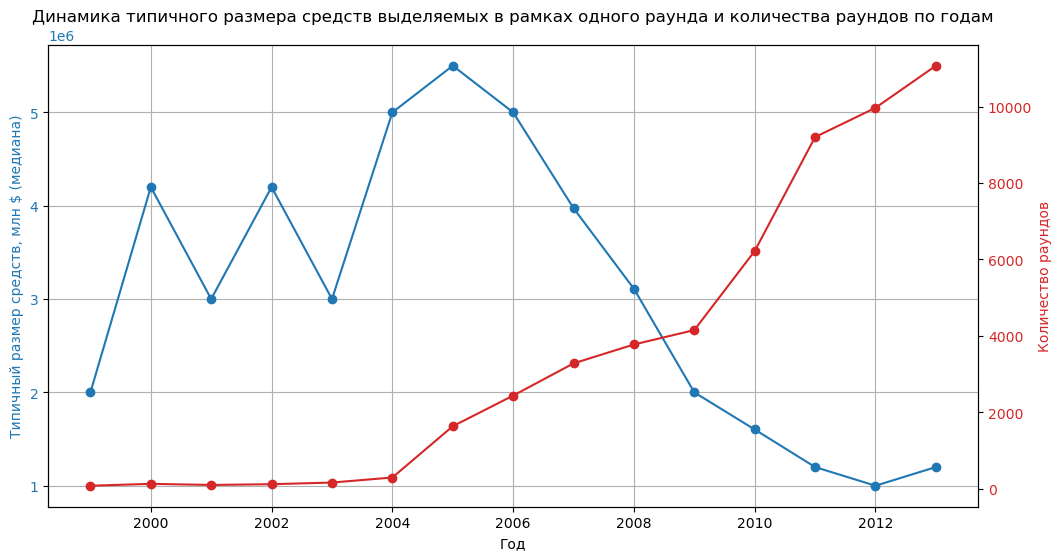

In [33]:
# Строим линейный график отражающий динамику типичного размера средств, 
# которые стартапы получали в рамках одного раунда финансирования и динамику количества раундов по годам.

# Построение графика
fig, ax1 = plt.subplots(figsize=(12,6))

# Первичная ось для отображения типичного размера средств.
color = 'tab:blue'
ax1.set_xlabel('Год')
ax1.set_ylabel('Типичный размер средств, млн $ (медиана)', color=color)
ax1.plot(funding_by_year['fund_year'], funding_by_year['typical_raised_amount'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Вторичная ось для отображения количества раундов.
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Количество раундов', color=color)
ax2.plot(funding_by_year['fund_year'], funding_by_year['total_rounds'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Динамика типичного размера средств выделяемых в рамках одного раунда и количества раундов по годам')
plt.show()

- Наивысшее медианное значение собранных средств зафиксировано в 2005 году, оно составляет 5 500 000.
- В 2013 году количество раундов финансирования достигло максимума (11 072), продолжив общий рост, который наблюдается с 2001 года, с заметным ускорением после 2009 года.
- Типичный размер средств в 2013 году составил 1 200 000, что немного выше, чем в 2012 году (1 000 000). Однако этот рост нельзя назвать тенденцией, скорее небольшим колебанием после длительного снижения.
- С 2005 года количество раундов растёт (продолжая динамику начавшуюся в 2001), а медианный размер выделяемых на финансирования средств падает. Отталкиваясь от этого можно предположить что инвесторы стали выделять меньше средств компаниям, при этом, растущее количество раундов может говорить как о увеличивающемся количестве компаний, которым выделяется финансирование (например стартапы), так и о присутствии в выборке компаний проходящих несколько раундов финансирования. Уменьшающееся количество средств также может говорить о наличии иных факторов, например разного рода рисков, которых можно избежать урезав финансирование.

### Люди и их образование

- В рамках анализа была изучена полнота информации об образовании сотрудников стартапов и её зависимость от размера компании.
- Для анализа использовались данные о сотрудниках из датасета `people` и информация об образовании из датасета `education`.
- Компании были разделены на группы в зависимости от количества сотрудников, после чего для каждой группы была рассчитана средняя доля сотрудников, по которым отсутствует информация об образовании.
- Дополнительно была оценена целесообразность использования датасета `degrees` для решения поставленной задачи.

---
- Разделяем компании на четыре группы по количеству сотрудников, расчитываем долю сотрудников у которых не указана информация об образовании для каждой группы и выводим результат в табличном виде.

In [34]:
# Считаем количество сотрудников в каждой компании.
company_sizes = people_df.groupby('company_id')['id'].count().reset_index(name='num_employees')

# Объединяем people_df с education_df по столбцам id и person_id.
people_and_education = people_df.merge(
    education_df, 
    left_on='id', 
    right_on='person_id', 
    how='left'
)

# Добавляем в датасет people_and_education столбец показывающий наличие/отсутствие информации об образовании 
# на основании наличия записей в столбцх institution или graduated_at.
people_and_education['has_education'] = people_and_education['institution'].notna() | people_and_education['graduated_at'].notna()

# Группируем данные по id сотрудника для того чтобы не было повторений, 
# поскольку у сотрудника может быть несколько степеней.
people_and_education = people_and_education.groupby('id_x').agg(
    company_id=('company_id', 'first'),
    has_education=('has_education', 'max')
).reset_index()

# Объединяем датафремы people_df и degrees_df.
people_and_degrees = people_df.merge(
    degrees_df, 
    left_on='id', 
    right_on='object_id', 
    how='left'
)
# Добавляем столбец показывающий наличие информации обобразовании сотрудника на основе значений в 
# столбцах degree_type и subject.
people_and_degrees['has_degree'] = people_and_degrees['degree_type'].notna() | people_and_degrees['subject'].notna()

# Группируем данные по id сотрудника для того чтобы не было повторений.
people_and_degrees = people_and_degrees.groupby('id_x').agg(
    has_degree=('has_degree', 'max')
).reset_index()

# Объединяем датасеты в один - хранящий информацию о наличии данных об образовании из people_and_education и people_and_degrees.
people_full = people_and_education.merge(
    people_and_degrees, 
    left_on='id_x', 
    right_on='id_x', 
    how='left'
)

# Добавляем столбец показывающий есть ли у сотрудника информация об образовании на основе данных 
# в столбцах has_education и has_degree.
people_full['has_any_education'] = people_full['has_education'] | people_full['has_degree']

# Считаем по компаниям долю сотрудников без информации об образовании.
education_by_company = people_full.groupby('company_id').agg(
    total_employees=('id_x', 'count'),
    employees_with_edu=('has_any_education', 'sum')
).reset_index()

# Добавляем столбец employees_without_edu для хранения количества сорудников без образования.
education_by_company['employees_without_edu'] = education_by_company['total_employees'] - education_by_company['employees_with_edu']

# Добавляем столбец share_without_edu для хранения доли сорудников без образования.
education_by_company['share_without_edu'] = education_by_company['employees_without_edu'] / education_by_company['total_employees']

# Объединяем education_by_company с company_sizes (кол-во сотрудников для каждой компании).
education_by_company = education_by_company.merge(company_sizes, on='company_id', how='left')

In [35]:
# Выводим количество компаний для каждого значения числа сотрудников.
education_by_company['total_employees'].value_counts().sort_values(ascending=False)

total_employees
1      18116
2       2709
3        921
4        450
5        237
6        138
7        100
8         59
9         46
11        30
10        25
13        17
12        16
14         8
17         5
16         4
20         3
18         3
15         3
19         3
23         3
29         2
25         2
56         2
22         2
21         2
36         1
26         1
150        1
61         1
244        1
48         1
51         1
32         1
63         1
39         1
47         1
35         1
138        1
31         1
72         1
Name: count, dtype: int64

- По распределению видно что большинство компаний насчитывают всего одного сотрудника (18 116).
- Довольно много компаний имеют 2-х сотрудников (2 709).
- Средние значения встречаются реже: например, 3-7 сотрудников у 921, 450, 237, 138 и 100 компаний.
- Компаний с численностью 8-14 сотрудников существенно меньше (от 8 до 59 компаний на каждое значение).
- Более крупных компаний (15-25 сотрудников) еще меньше (2-3 компаний).
- Компаний с числом сотрудников более 25 очень мало, по одной компании на каждое отдельное количество сотрудников, крупнейшая - с 244 сотрудниками.
- Распределение показывает, что большинство организаций представлены микрокомпаниями с минимальным числом сотрудников. Это говорит о высокой доле очень маленьких компаний в выборке.
- Исходя из этого, для расчета средней доли сотрудников без образования, компании будут разделены на следующие категории (по количеству сотрудников): 1, 2, 3, 4-5, 6-10, 11-25, 26+.

In [36]:
# При помощи функции cut() создаем категории для разделения компаний на группы и добавляем столбец size_group 
# для последующей группировки.
bins = [0, 1, 2, 3, 5, 10, 25, float('inf')]
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']
education_by_company['size_group'] = pd.cut(education_by_company['num_employees'], bins=bins, labels=labels)

# Считаем среднюю долю сотрудников без информации об образовании по группам и количество компанйи в каждой из групп.
result = education_by_company.groupby('size_group').agg(
    companies_count=('company_id', 'count'),
    share_without_edu=('share_without_edu', 'mean')
).reset_index()

display(result)

C:\Users\admin\AppData\Local\Temp\ipykernel_14272\3886156368.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = education_by_company.groupby('size_group').agg(


,size_group,companies_count,share_without_edu
0,1,18116,0.462575
1,2,2709,0.466039
2,3,921,0.486790
3,4-5,687,0.497307
4,6-10,368,0.531828
5,11-25,101,0.458760
6,26+,19,0.265466


- По результатам анализа видно, что в компаниях с одним (18116 компаний) и двумя (2709 компаний) сотрудниками информация об образовании отсутсвует в приблизительно 46%-47% случаях.
- В компаниях с 3 сотрудниками (921 компаний) и 4-5 сотрудниками (687 компаний) доля отсутствущей информации составляет приблизительно 49%-50%.
- В компаниях с 6-10 сотрудниками (368 компаний) - доля составляет приблизительно 53%.
- В компаниях с 11-25 сотрудниками (101 компания) - приблизительно 46%.
- В компаниях с 26 и более сотрудниками (19 компаний) доля отсутствущей информации наименьшая, относительно других категорий, она состаляет приблизительно 27%.

- Было принято решение учесть данные датасета `degrees_df` для определения полноты информации об образовании сотрудников. Данный датасет хранит в себе детальную информацию об образовании, и в теории, если по каким-либо причинам данные не были занесены в столбцы `institution` и `graduated_at` (датасета `education_df`), но были занесены в столбцы `degree_type` и `subject` (датасета `degrees_df`), то можно исказить результат если не учесть данные датасета `degrees_df` в финальном подсчете.

### 2.3. Возможность объединения данных по столбцу `network_username`

- В ходе предварительного анализа датасетов было установлено, что столбец `company_id` может быть использован для объединения данных.
- Дополнительно была исследована возможность использования столбца `network_username`, который присутствует в нескольких датасетах.
- Цель анализа - определить, дублируется ли информация, содержащаяся в данном столбце, между различными датасетами, а также оценить частоту таких совпадений.
- На основе полученных результатов была дана оценка целесообразности использования столбца `network_username` в качестве ключа для объединения данных.

---

- Столбцы `network_username` присутствуют в трех датасетах: `company_and_rounds_df` (ник компании в сети), `people_df` (ник сотрудника в социальных сетях) и `fund_df` (ник фонда в сети).
- Отталкиваясь от описания данных можно сразу предположить что возможность объединения датасетов по одноименным столбцам маловероятна, поскольку они хранят разные сущности (инормацию о компании, сотруднике, фонде).

- Несмотря на предварительные предположения проверим данные в столбцах. Посчитаем количество уникальных значений, выясним есть ли пересечения между столбцами.

In [37]:
# Считаем уникальные значения в столбцах network_username.
# Удаляем пропуски и приводим данные в нижний регистр для корректного расчета.
print("Уникальных username в company_and_rounds:", company_and_rounds_df['network_username'].dropna().str.lower().nunique())
print("Уникальных username в people:", people_df['network_username'].dropna().str.lower().nunique())
print("Уникальных username в fund:", fund_df['network_username'].dropna().str.lower().nunique())

Уникальных username в company_and_rounds: 79374
Уникальных username в people: 38384
Уникальных username в fund: 2091


In [38]:
# Создаём множества значений из столбцов network_username с трех таблиц.
# Удаляем пропуски и приводим данные в нижний регистр для корректного расчета.
companies = set(company_and_rounds_df['network_username'].dropna().str.lower())
people = set(people_df['network_username'].dropna().str.lower())
funds = set(fund_df['network_username'].dropna().str.lower())

# Находим пересечения для проверки совпадений.
common_companies_people = companies & people
common_companies_fund = companies & funds
common_people_fund = people & funds

print("Совпадений компания-сотрудники:", len(common_companies_people))
print("Совпадений компания-фонд:", len(common_companies_fund))
print("Совпадений сотрудники-фонд:", len(common_people_fund))

Совпадений компания-сотрудники: 2503
Совпадений компания-фонд: 87
Совпадений сотрудники-фонд: 96


- В трёх датасетах поле `network_username` имеет одинаковое название, однако по смыслу оно хранит разные сущности: у компаний - ник компании в сети, у сотрудников - ник сотрудника в соцсетях, у фондов - ник фонда.
- Проверка показала, что пересечения между значениями действительно есть: `company_and_rounds_df` и `people_df` - 2 503 совпадений, `company_and_rounds_df` и `fund_df` - 87 совпадение, `people_df` и `fund_df` - 96 совпадений.
- При этом количество совпадений невелико по сравнению с общим числом уникальных значений (79 374 у компаний, 38 384 у сотрудников, 2 091 у фондов). Это указывает на то, что совпадения скорее случайные или связаны с ошибками/неточностями в данных.
- Из этого можно сделать вывод что использовать `network_username` для объединения таблиц нельзя, несмотря на одинаковое название столбцов.

### Проблемный датасет и причина возникновения пропусков

- В ходе анализа было выявлено, что датасет `company_and_rounds` содержит значительное количество пропусков в информации о раундах финансирования, что усложняет проведение анализа на уровне отдельных компаний.
- Для дальнейшего исследования данные были приведены в формат, позволяющий выполнять анализ в разрезе компаний. При подготовке данных были проанализированы структура датасета, порядок и названия столбцов, а также характер содержащихся в них значений.
- В процессе преобразования данных основное внимание уделялось сохранению максимального объёма информации и связности данных, а также исключению возможных ошибок, возникающих при изменении структуры.
- В результате подготовленные данные позволяют отбирать компании по заданным параметрам и рассчитывать показатели в пересчёте на одну компанию без необходимости выполнения промежуточных агрегаций.

In [39]:
# Выводим информацию о датасете company_and_rounds_df.
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  Int64         
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  Int64         
 10  funding_rounds       217472 non-null  Int64         
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  Int64         
 13  funding_round_

- Для более удобной работы с данными необходимо создать два отдельный датасета: первый - с информацией о компаниях, второй - с информацией о раундах финансирования. Решение было принято исходя из структуры датасета `company_and_rounds_df`. По наименованиям столбцов (в частности `company_ID` и `company_id`) и определению хранимых в них данных можно понять что датасет - объединение двух таблиц. 
- В информации о датасете можно заметить что у многих столбцов одинаковое, либо примерно одинаковое количество заполненных значений, это также говорит об их ранней принадлежности к одному датасету.

In [40]:
# Создаем два датафрейма: company_df - с информацией о компаниях, rounds_df - с информацией о раундах.
company_df = company_and_rounds_df.iloc[:, :13]
rounds_df =  company_and_rounds_df.iloc[:, 13:]

In [41]:
# Выводим количество уникальных значений в столбце funding_round_id и количество строк датафрейма.
print(f"Количество уникальных значений: {company_df['company_ID'].nunique()}")
print(f"Количество строк: {company_df.shape[0]}")

Количество уникальных значений: 196553
Количество строк: 217774


In [42]:
# Убираем дубликаты по столбцу company_ID и удаляем строки с пропущенными значениями company_ID.
company_df = company_df.drop_duplicates(subset=['company_ID']).dropna(subset=['company_ID'])

In [43]:
# Сбрасываем индекс для корректного отображения.
rounds_df = rounds_df.reset_index(drop=True)

In [44]:
# Выводим количество уникальных значений в столбце funding_round_id и количество строк датафрейма.
print(f"Количество уникальных значений: {rounds_df['funding_round_id'].nunique()}")
print(f"Количество строк: {rounds_df.shape[0]}")

Количество уникальных значений: 52928
Количество строк: 217774


In [45]:
# Убираем дубликаты по столбцу funding_round_id и удаляем строки с пропущенными значениями funding_round_id.
rounds_df = rounds_df.drop_duplicates(subset=['funding_round_id']).dropna(subset=['funding_round_id'])

In [46]:
# Сбрасываем индекс для корректного отображения.
rounds_df = rounds_df.reset_index(drop=True)

In [47]:
# Переименовываем столбец с ID компании в датарейме company_df для удобства.
company_df = company_df.rename(columns={'company_ID': 'company_id'})

- Датафрейм `company_and_rounds_df` был разделен на два датафрейма `company_df` и `rounds_df`.
- В датафремах `company_df` и `rounds_df` были удалены дубликаты по столбцам `company_ID` и `funding_round_id` соответственно, также, удалены строки с пропусками в данных столбцах.
- Столбец `company_ID` датафрейма `company_df` был переименован в `company_id` для удобства работы.
- Датафрейм `company_df` хранит информацию об уникальных компаниях, ключ `company_ID`.
- Датафрейм `rounds_df` хранит информацию о раундах финансирования, ключ `funding_round_id`, связь с `company_df` через `company_id`.

- Создаем новый датафрейм `company_and_rounds_new_df` объединяя `company_df` и `rounds_df` по `company_id` при помощи `full outer join` для того чтобы сохранить все ID компаний с исходного датафрейма. Ранее было выяснено что в столбце `company_id` относящемся к информации о раундах присутствует 232 уникальных идентификатора компаний.

In [48]:
# Создаем новый датафрейм.
company_and_rounds_new_df = company_df.merge(rounds_df, on='company_id', how='outer')

- Проверяем количество уникальных ID компаний в исходном (`company_and_rounds_df`) и в новом (`company_and_rounds_new_df`) датафреймах.

In [49]:
# Испольуем множества для определения уникальных значений.
set_company = set(company_and_rounds_df['company_id'].dropna())
set_rounds = set(company_and_rounds_df['company_ID'].dropna())

# При помощи union определяем количество уникальных ID в старом датаферйме.
unique_total_old = set_company.union(set_rounds)

# Определяем количество уникальных ID в новом датафрейме.
unique_total_new = company_and_rounds_new_df['company_id'].nunique()

print("Уникальных ID компаний в исходном датафрейме:", len(unique_total_old))
print("Уникальных ID компаний в новом датафрейме:", unique_total_new)

Уникальных ID компаний в исходном датафрейме: 196785
Уникальных ID компаний в новом датафрейме: 196785


- Исходный датафрейм `company_and_rounds_df` был разделен на два датафрейма `company_df` и `rounds_df`. 
- В датафреймах были удалены дубликаты и пропуски.
- Для удобства последующего анализа был создан новый датарейм `company_and_rounds_new_df` путем объединения `company_df` и `rounds_df` по `company_id` при помощи `full outer join` для сохранения уникальных идентификаторов компаний с `company_df` и добавления уникальных идентификаторов с `rounds_df`.
- Проведена проверка уникальности - итоговое количество уникальных идентификаторов компаний в новом датафрейме совпало с суммарным количеством уникальных идентификаторов (`company_id` и `company_ID`) в исходном датафрейме.

## Исследовательский анализ объединённых таблиц


### 3.1. Объединение данных

- В рамках анализа была сформирована объединённая таблица компаний, представляющих потенциальный интерес с точки зрения покупки или продажи бизнеса.
- В качестве основы использовались данные из обработанного датасета `company_and_rounds`, содержащего информацию о компаниях и их раундах финансирования.
- В выборку были включены компании, которые:
    - привлекали инвестиции или участвовали в раундах финансирования (`funding_rounds` > 0 или `investment_rounds` > 0),
    - либо имели статус `acquired`.
- Такой подход позволил отобрать компании, демонстрирующие инвестиционную активность или готовность к смене владельца.
- В результате была получена итоговая таблица, включающая порядка 40 тысяч компаний.
- Дополнительно была проведена проверка полноты и корректности данных, после чего дальнейший анализ выполнялся исключительно на основе полученной выборки.

In [50]:
# Создаем датафрейм со значениями в столбцах funding_rounds или investment_rounds больше 0, 
# или со значением столбца status равным acquired (отталкиваясь от условий задания).
companies_of_interest_df = company_df[
    (company_df['funding_rounds'] > 0) | 
    (company_df['investment_rounds'] > 0) | 
    (company_df['status'] == 'acquired')]

In [51]:
# Сбрасываем индекс для корректного отображения.
companies_of_interest_df = companies_of_interest_df.reset_index(drop=True)

In [52]:
# Выводим общую информацию о получившемся датасете.
companies_of_interest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40747 entries, 0 to 40746
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  Int64         
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  Int64         
 10  funding_rounds     40747 non-null  Int64         
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  Int64         
dtypes: Int64(4), datetime64[ns](2), float64(1), object(6)
memory 

- Для последующего анализа нам понадобятся только столбцы `company_id`, `name`, `status`, `category_code`, `funding_rounds` и `funding_total`, поэтому следует исключить из датафрейма `companies_of_interest_df` все столбцы не представляющие ценности в контексте текущего анализа.

In [53]:
# Создадим список с наименованиями необходимых для анализа столбцов.
cols_to_keep = [
    'company_id',
    'name',
    'status',
    'category_code',
    'funding_rounds',
    'funding_total'
]
# Перезаписываем датафрейм, оставляя только необходимые столбцы
companies_of_interest_df = companies_of_interest_df[cols_to_keep].copy()

In [54]:
# Выводим обновленный датафрейм с ключевыми для анализа данными.
companies_of_interest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40747 entries, 0 to 40746
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company_id      40747 non-null  Int64  
 1   name            40747 non-null  object 
 2   status          40747 non-null  object 
 3   category_code   35315 non-null  object 
 4   funding_rounds  40747 non-null  Int64  
 5   funding_total   40747 non-null  float64
dtypes: Int64(2), float64(1), object(3)
memory usage: 1.9+ MB


In [55]:
# Выводим количество пропусков в абсолютном и относительном значениях.
pd.DataFrame({'Кол-во пропусков': companies_of_interest_df.isna().sum(), 
             'Доля (%)': round(companies_of_interest_df.isna().sum() / len(companies_of_interest_df) * 100, 2) })

,Кол-во пропусков,Доля (%)
company_id,0,0.00
name,0,0.00
status,0,0.00
category_code,5432,13.33
funding_rounds,0,0.00
funding_total,0,0.00


- Пропуски присутствуют только в столбце `category_code` хранящем данные о категории области деятельности компании, пропусков 5 432 - приблизительно 13% данных. Посколку категориальные данные невозможно корректно восстановить в данном случае, при исследовании цен стартапов по категориям эти записи будут исключены.

In [56]:
# Выводим уникальные значения столбца status.
list(companies_of_interest_df['status'].unique())

['operating', 'acquired', 'closed', 'ipo']

- Категории статусов уникальны, столбец не нуждается в обработке.

In [57]:
# Создаем список столбцов для преобразования.
columns_to_normalize = ['name', 'category_code']

# Удаляем пробелы и приводим значения к нижнему регистру.
for col in columns_to_normalize:
    companies_of_interest_df[col] = companies_of_interest_df[col].str.strip().str.lower()

In [58]:
# Проверяем уникальны ли идентификаторы и наименования компаний в датафрейме.
if all([
    companies_of_interest_df['company_id'].is_unique,
    companies_of_interest_df['name'].is_unique
]):
    print('Идентификаторы и наименования компаний уникальны.')
else:
    print('В датасете есть повторы.')

Идентификаторы и наименования компаний уникальны.


- Данные столбцов `company_id` и `name` были преобразованы в удобный для работы формат. Проверка показала что значения в стобцах уникальны.

In [59]:
# Проверяем есть ли в столбцах funding_rounds и funding_total отрицатеьные значения.
if len(companies_of_interest_df[
    (companies_of_interest_df['funding_rounds'] < 0) | 
    (companies_of_interest_df['funding_total'] < 0)]) == 0:
    print('Столбцы не содержат отрицательных значений.')
else:
    print('Столбцы содержат отрицательные значения.')

Столбцы не содержат отрицательных значений.


- Проверка показала что в столбцах `funding_rounds` и `funding_total` нет отрицательных значений.

---
- На основе датафрейма `company_df` был создан новый датафрейм `companies_of_interest_df` содержащий необходимую информацию для ответа на вопросы заказчика.
- Данные о компаниях были отобраны отталкиваясь от требований задания, в выборку вошли компании с числом раундов финансирования или инвестирования больше нуля, либо имеющие статус `acquired`.
- Для удобства анализа значения в столбцах `name` и `category_code` были нормализованы (удалены лишние пробелы и приведены к нижнему регистру). Проверка показала, что идентификаторы и наименования компаний уникальны, а в числовых столбцах отсутствуют некорректные (отрицательные) значения.


### Анализ выбросов

- В ходе анализа был рассмотрен общий объём финансирования, который компании получали за исследуемый период.
- С помощью графиков было изучено распределение показателя `funding_total`, чтобы понять, какие значения можно считать типичными, а какие - выбивающимися.
- Также были рассмотрены основные статистики показателя (метод `.describe()`), чтобы лучше понять его распределение.
- По результатам анализа сделан вывод о том, насколько стандартные способы определения типичных значений подходят для этих данных.

In [60]:
# Выводим сводную статистику по столбцу funding_total в удобочитаемом формате.
companies_of_interest_df['funding_total'].describe().apply(lambda x: f"{x:,.0f}")

count           40,747
mean        10,135,610
std         56,464,360
min                  0
25%                  0
50%            600,000
75%          5,650,650
max      5,700,000,000
Name: funding_total, dtype: object

- Среднее значение суммы финансирования составляет около 10,1 млн, при этом медиана равна 600 тыс. Разница между средним и медианой указывает на сильную правостороннюю асимметрию распределения.
- В данных присутствуют экстремально большие значения (до 5,7 млрд), которые сильно смещают среднее вверх.
- Стандартное отклонение (~56 млн) значительно превышает медиану, что говорит о разнородности данных.
- В выборке встречаются нулевые значения. Их нельзя однозначно считать ошибочными, однако стоит дополнительно проверить наличие записей с нулевыми значениями в обоих столбцах, такие случаи можно считать ошибочными поскольку при наличии хотя бы одного раунда финансирования должна быть указана сумма финансирования.

- Проверяем количество записей с нулевой суммой финансирования при наличии хотя бы одного раунда финансирования.

In [61]:
no_funding_total = len(companies_of_interest_df[(
                    companies_of_interest_df['funding_total'] == 0) & 
                    (companies_of_interest_df['funding_rounds'] > 0)])
no_funding_total_share = round(no_funding_total / len(companies_of_interest_df) * 100, 2)
print(f"У {no_funding_total} компаний не указана сумма финансирования при наличии раундов финансирования, {no_funding_total_share}% компаний.")

У 3833 компаний не указана сумма финансирования при наличии раундов финансирования, 9.41% компаний.


- В выборке у 3833 (9.41%) компаний не указана сумма финансирования при наличии раундов финансирования. Данные предположительно ошибочны, либо неполные, поскольку факт наличия раунда финансирования подразумевает получение средств компанией. 
- Исследование проведено дополнительно, и в текущем задании не влияет на анализ, поскольку записи с нулевым значенияем в столбце `funding_total` будут отсечены.

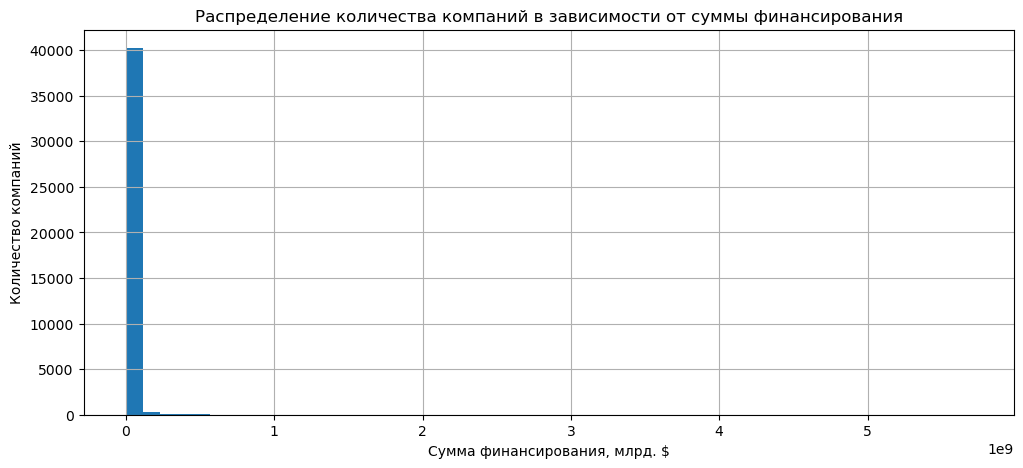

In [62]:
# Строим гистограмму распределения количества компаний в зависимости от суммы финансирования.
plt.figure(figsize=(12,5))
companies_of_interest_df['funding_total'].hist(bins=50)
plt.title("Распределение количества компаний в зависимости от суммы финансирования")
plt.xlabel("Сумма финансирования, млрд. $")
plt.ylabel("Количество компаний")
plt.show()

- По графику видно что большая часть компаний группируется около нулевой отметки, это естественно учитывая наличие в выборке экстремально больших и нулевых значений.

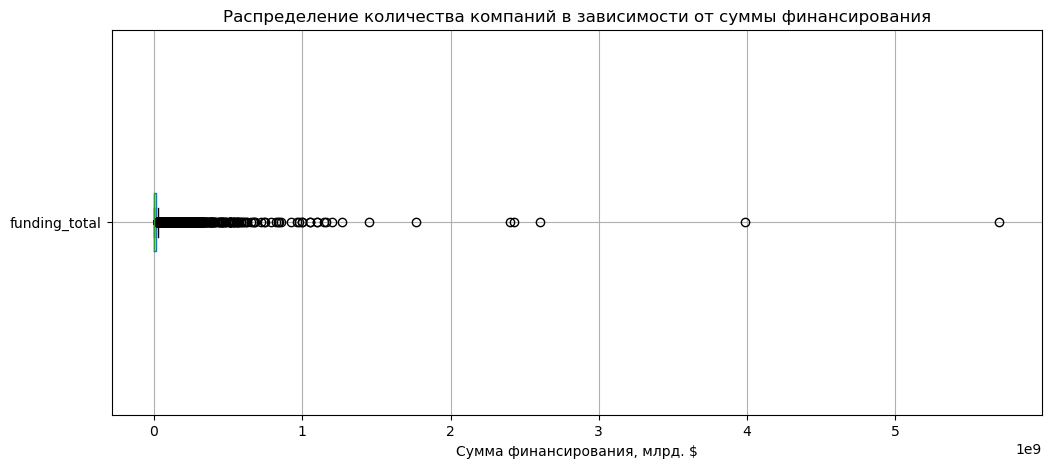

In [63]:
# Строим диаграмму размаха для отображения распределения сумм финансирования у компаний.
# При построении диаграммы исключаем нулевые значения.
plt.figure(figsize=(12, 5))
companies_of_interest_df[companies_of_interest_df['funding_total'] > 0].boxplot(column='funding_total', 
                                                                                vert=False, 
                                                                                showfliers=True)
plt.title('Распределение количества компаний в зависимости от суммы финансирования')
plt.xlabel('Сумма финансирования, млрд. $')
plt.show()

- Диаграмма размаха показывает достаточно много экстремальных значений, при этом сама диаграмма с квартилями даже не видна из-за выбросов.

- Рассчитываем межквартильный размах (IQR) для определения верхней границы выбросов, это нужно для того чтобы понимать какие значения следует отсечь для определения типичной суммы финансирования.

In [64]:
# Определяем 25-й и 75-й процентили.
Q1 = companies_of_interest_df['funding_total'].quantile(0.25)
Q3 = companies_of_interest_df['funding_total'].quantile(0.75)

# Рассчитываем межквартильный размах для определения нижней и верхней границ выбросов.
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = max(Q1 - 1.5 * IQR, 0)

print(f"Нижняя граница выбросов: {lower_bound}")
print(f"Верхняя граница выбросов: {upper_bound}")

Нижняя граница выбросов: 0
Верхняя граница выбросов: 14126625.0


In [65]:
# Создаем датафрейм на основе отфильтрованных данных.
companies_without_outliers = companies_of_interest_df[(companies_of_interest_df['funding_total'] > lower_bound) & 
                                                   (companies_of_interest_df['funding_total'] < upper_bound)]

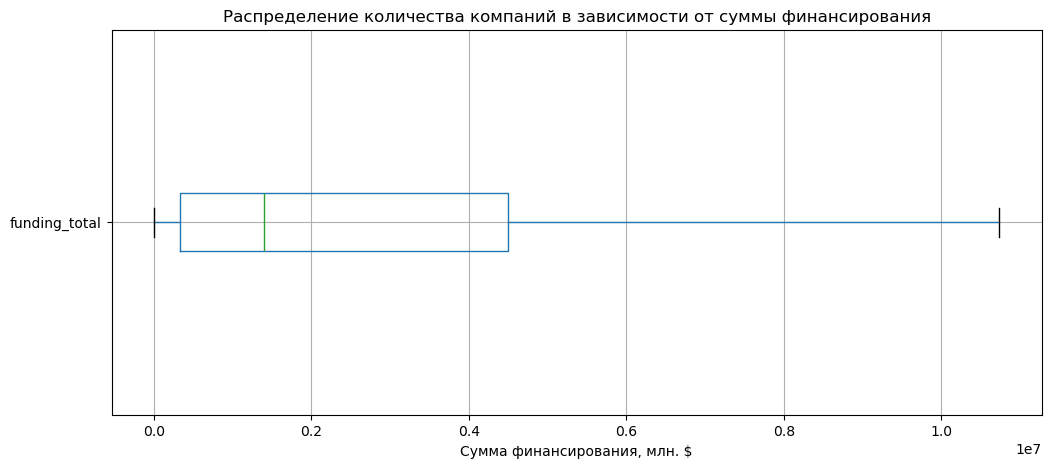

In [66]:
# Строим диаграмму размаха для отображения распределения сумм финансирования у компаний, на основе нового датафрейма.
plt.figure(figsize=(12, 5))
companies_without_outliers.boxplot(column='funding_total', vert=False, showfliers=False)
plt.title('Распределение количества компаний в зависимости от суммы финансирования')
plt.xlabel('Сумма финансирования, млн. $')
plt.show()

- На диаграмме видна правосторонняя ассиметрия, в выборке присутствуют компании с крупными суммами финансирования, медианное значение приблизительно равно 1.3 млн. - 1.4 млн.

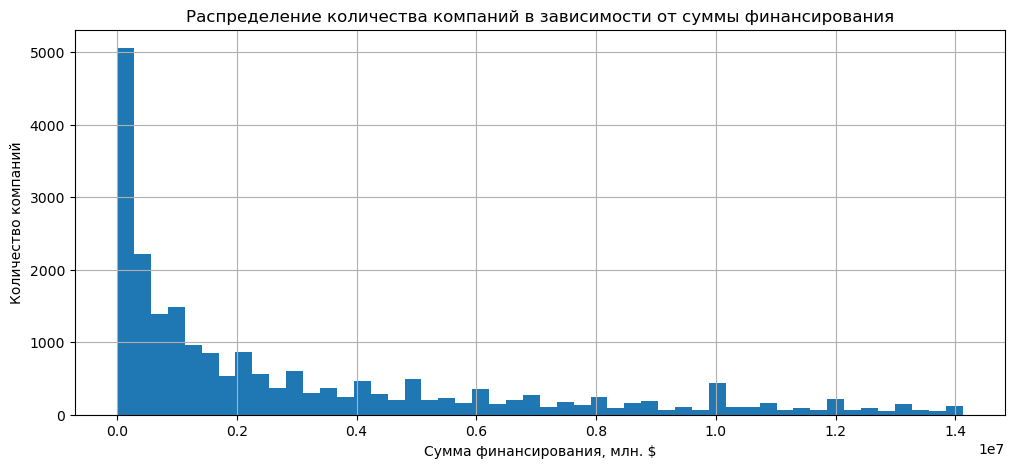

In [67]:
# Строим гистограмму распределения количества компаний в зависимости от суммы финансирования на основе нового датафрейма.
plt.figure(figsize=(12,5))
companies_without_outliers['funding_total'].hist(bins=50)
plt.title("Распределение количества компаний в зависимости от суммы финансирования")
plt.xlabel("Сумма финансирования, млн. $")
plt.ylabel("Количество компаний")
plt.show()

- На гистограмме также видна правосторонняя ассиметрия, видно что большая доля компаний группируется у нулевой отметки, то есть у значительной части компаний относительно невысокое финансирование

In [68]:
# Выводим сводную статистику столбца funding_total в удобочитаемом виде.
companies_without_outliers['funding_total'].describe().apply(lambda x: f"{x:,.0f}")

count        22,016
mean      2,964,868
std       3,527,162
min             291
25%         335,750
50%       1,400,000
75%       4,500,000
max      14,121,000
Name: funding_total, dtype: object

- При анализе распределения сумм финансирования была выявлена правосторонняя ассиметрия, наличие в выборке нулевых и экстремально высоких значений.
- Для определения границ выбросов был использован межквартильный размах (IQR). Верхняя граница выбросов составляет 14,13 млн., значения выше считаются нетипичными.
- Медианное (типичное) значение составляет 1,4 млн. (после отсечения выбросов).
- Медианное значение в выборке с выбросами составляет 600 000, что более чем в два меньше медианы выборки без выбросов.
- Было принято решение использовать именно медианное значение для отображения типичного размера финансирования, поскольку несмотря на отсечение выбросов, в выборке все равно присутствует правосторонняя асимметрия и медиана тут наиболее репрезентативна.


### 3.3. Куплены забесплатно?

- В рамках анализа были рассмотрены компании, которые были приобретены за символическую стоимость (0 или 1 доллар) при наличии ненулевого общего объёма финансирования.
- Для таких компаний был проведён анализ распределения показателя `funding_total` с целью выявления нетипичных значений.
- Были рассчитаны нижняя и верхняя границы выбросов для общего объёма финансирования, а также, процентили соответствующие этим границам.

---
- Исследуем компании проданные за 0 или 1 доллар, с ненулевым общим объемом финансирования.

In [69]:
# Создаем датафрейм путем объединения companies_of_interest_df и acquisition_df при помощи inner join.
companies_with_acquisition_df = acquisition_df.merge(
    companies_of_interest_df, 
    left_on='acquired_company_id', 
    right_on='company_id', 
    how='inner')

In [70]:
# Проверяем столбец company_id на наличие дубликатов.
company_id_duplicated = companies_with_acquisition_df.duplicated(subset='company_id').sum()
print(f"Дублирующихся значений в столбце company_id: {company_id_duplicated}.")

Дублирующихся значений в столбце company_id: 143.


In [71]:
# Выводим дублирующиеся компании с сортировкой по acquiring_company_id (company_id).
companies_with_acquisition_df[
    companies_with_acquisition_df.duplicated(subset='company_id', keep=False)
].sort_values(by='company_id').head(15)

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,company_id,name,status,category_code,funding_rounds,funding_total
5429,5984,13,13,NaN,29000000,2009-04-01,13,stumbleupon,acquired,web,4,18500000.0
3838,4283,20,13,NaN,0,2007-05-30,13,stumbleupon,acquired,web,4,18500000.0
5275,5806,20,62,NaN,2600000000,2005-09-12,62,skype,acquired,software,5,76805000.0
4994,5504,1242,62,cash,8500000000,2011-05-10,62,skype,acquired,software,5,76805000.0
4945,5451,29,75,cash,0,2005-12-01,75,delicious,acquired,web,1,0.0
7750,8668,74819,75,NaN,0,2011-04-27,75,delicious,acquired,web,1,0.0
4603,5073,475,130,NaN,0,2011-01-31,130,kickapps,acquired,enterprise,3,39007800.0
8072,9040,234881,130,NaN,0,2012-12-12,130,kickapps,acquired,enterprise,3,39007800.0
5403,5955,5602,142,NaN,10000000,2010-06-17,142,bebo,acquired,web,1,15000000.0
163,213,351,142,cash,850000000,2008-03-13,142,bebo,acquired,web,1,15000000.0


- По выборке можно заметить что у некоторых компаний дублируются идентификатор покупаемой компании (`acquired_company_id` / `company_id`). В таких записях отличаются идентификатор покупающей компании (`acquiring_company_id`) и дата сделки (`acquired_at`).
- Можно сделать вывод что идентификаторы покупаемых компаний дублируются из-за того что их покупали несколько раз (разные компании, в разное время).
- Удалять такие записи не следует, поскольку они отражают реальные сделки.

In [72]:
# Фильтруем данные в датафрейме (компании купленные за 0/1 $ с ненулевым объемом финансирования).
bought_for_zero_one = companies_with_acquisition_df[
    companies_with_acquisition_df['price_amount'].isin([0, 1]) & 
    (companies_with_acquisition_df['funding_total'] > 0)]

In [73]:
# Считаем количество компаний в зависимости от статуса.
pd.DataFrame(bought_for_zero_one.groupby('status')['acquired_company_id'].count())

,acquired_company_id
status,
acquired,1618


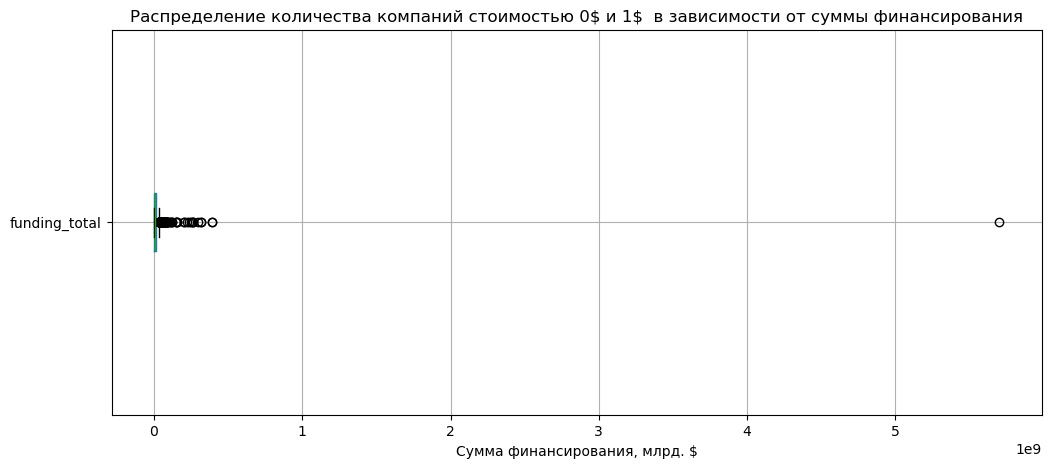

In [74]:
# Строим диаграмму размаха для отображения распределения сумм финансирования у компаний, проданных за 0$ и 1$.
bought_for_zero_one.boxplot(column='funding_total', vert=False, showfliers=True, figsize=(12, 5))
plt.title('Распределение количества компаний стоимостью 0\$ и 1\$  в зависимости от суммы финансирования')
plt.xlabel('Сумма финансирования, млрд. $')
plt.show()

In [75]:
# Находим сильно выбивающуюся компаниию по сумме финансирования.
bought_for_zero_one[bought_for_zero_one['funding_total'] == bought_for_zero_one['funding_total'].max()]

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,company_id,name,status,category_code,funding_rounds,funding_total
7198,8023,3827,13219,NaN,0,2012-12-17,13219,clearwire,acquired,mobile,4,5.700000e+09


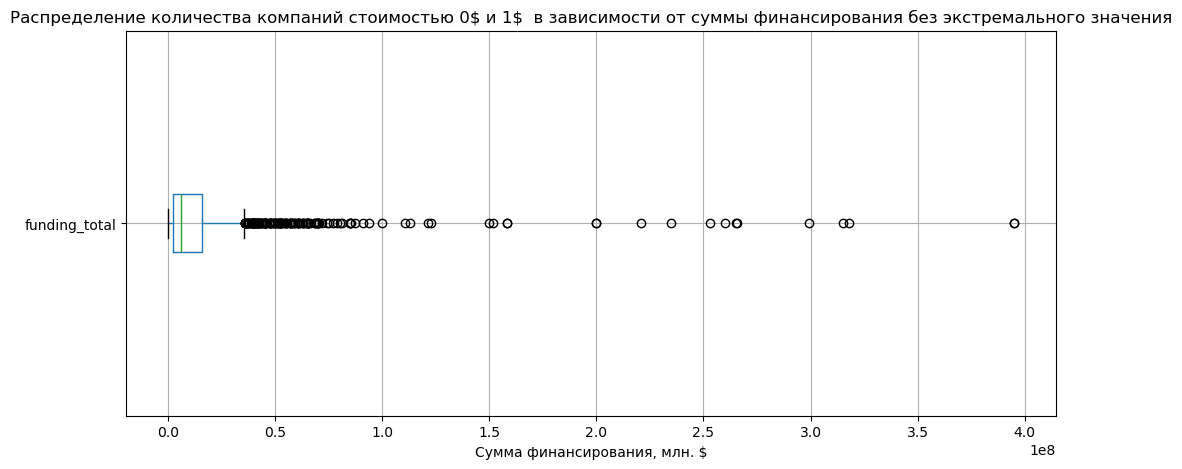

In [76]:
# Строим диаграмму размаха для отображения распределения сумм финансирования у компаний, проданных за 0$ и 1$.
# Исключаем экстремальное значение.
bought_for_zero_one_wtht_outliers = bought_for_zero_one[bought_for_zero_one['funding_total'] 
                                                        < bought_for_zero_one['funding_total'].max()]

bought_for_zero_one_wtht_outliers.boxplot(column='funding_total', vert=False, showfliers=True, figsize=(12, 5))
plt.title('Распределение количества компаний стоимостью 0\$ и 1\$  в зависимости от суммы финансирования без экстремального значения')
plt.xlabel('Сумма финансирования, млн. $')
plt.show()

In [77]:
# Выводим сводную статистику по столбцу funding_total в удобочитаемом формате.
bought_for_zero_one_wtht_outliers['funding_total'].describe().apply(lambda x: f"{x:,.0f}")

count          1,617
mean      14,639,142
std       30,072,399
min            3,750
25%        2,000,000
50%        6,000,000
75%       15,500,000
max      395,000,000
Name: funding_total, dtype: object

- Все компании подпадающие под условие задания (проданные за 0 или 1 доллар, c ненулевым объёмом финансировани) имеют статус acquired (приобретенные).
- На диаграмме размаха наблюдается правосторонняя ассиметрия, присутсвуют выбросы, в частности один экстремальный выброс - значение суммы финансирования 5,7 млрд, оно относится к компании Clearwire.
- На диаграмме размаха с исключенным экстремальным значением также наблюдается правосторонняя ассиметрия, присутствуют выбросы. Вторая диаграмма создана для удобной визуализации распределения.
- Медианное значение сумм финансирования таких компаний составляет 6 млн., среднее - ~14.6 млн. (с исключенным экстремальным значением).
---

- Проанализируем столбец `funding_total`, определим верхнюю и нижнюю границы выбросов и найдем соответствующие им процентили.

In [78]:
# Создаем новый датафрейм на основе companies_with_acquisition_df исключая нулевые значения в столбце funding_total.
companies_with_acquisition_fltr_df = companies_with_acquisition_df[companies_with_acquisition_df['funding_total'] > 0]

In [79]:
# Выводим сводную статистику по столбцу funding_total в удобочитаемом формате.
companies_with_acquisition_fltr_df['funding_total'].describe().apply(lambda x: f"{x:,.0f}")

count            2,349
mean        22,279,705
std        124,475,144
min              3,750
25%          2,900,000
50%          8,500,000
75%         21,750,000
max      5,700,000,000
Name: funding_total, dtype: object

In [80]:
# Определяем 25-й и 75-й процентили.
Q1 = companies_with_acquisition_fltr_df['funding_total'].quantile(0.25)
Q3 = companies_with_acquisition_fltr_df['funding_total'].quantile(0.75)

# Рассчитываем межквартильный размах для определения нижней и верхней границ выбросов.
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = max(Q1 - 1.5 * IQR, 0)

print(f"Нижняя граница выбросов: {lower_bound}")
print(f"Верхняя граница выбросов: {upper_bound}")

Нижняя граница выбросов: 0
Верхняя граница выбросов: 50025000.0


In [81]:
# Определяем процентили полученных границы выбросов.
lower_bound_percentile = (companies_with_acquisition_fltr_df['funding_total'] <= lower_bound).mean() * 100
upper_bound_percentile = (companies_with_acquisition_fltr_df['funding_total'] <= upper_bound).mean() * 100
print(f"Нижняя граница ({lower_bound}) соответствует примерно {lower_bound_percentile:.2f} процентилю")
print(f"Верхняя граница ({upper_bound}) соответствует примерно {upper_bound_percentile:.2f} процентилю")

Нижняя граница (0) соответствует примерно 0.00 процентилю
Верхняя граница (50025000.0) соответствует примерно 91.10 процентилю


In [82]:
# Дополнительно определяем нулевой процентиль.
companies_with_acquisition_fltr_df['funding_total'].quantile(0)

np.float64(3750.0)

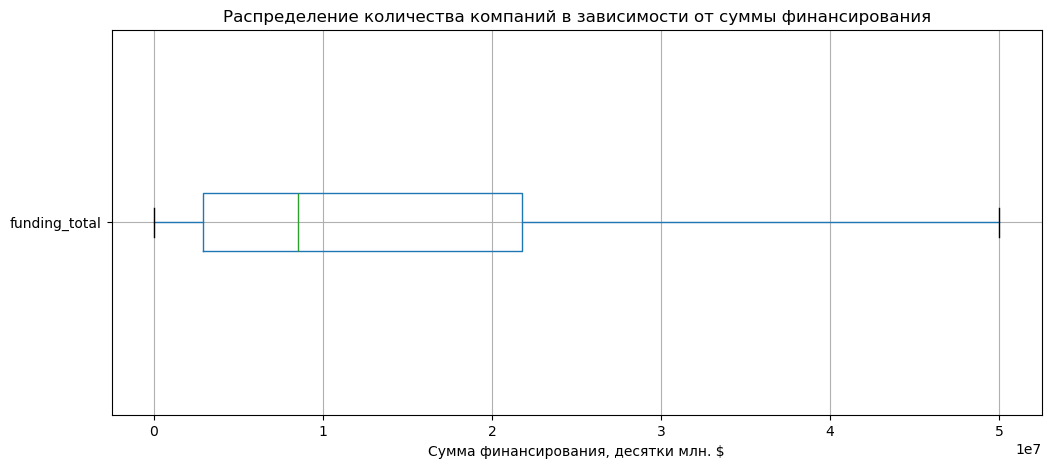

In [83]:
# Строим диаграмму размаха для отображения распределения сумм финансирования у компаний (без нулевых значений).
companies_with_acquisition_fltr_df.boxplot(column='funding_total', vert=False, showfliers=False, figsize=(12, 5))
plt.title('Распределение количества компаний в зависимости от суммы финансирования')
plt.xlabel('Сумма финансирования, десятки млн. $')
plt.show()

- Верхняя граница выбросов (50 025 000) равна примерно 91.10 процентилю, то есть примерно 91,1% значений столбца `funding_total` ниже текущего значения.
- Нижняя граница выбросов (0) равна нулевому процентилю, это естественно, поскольку датафрейм был создан с условием отсутствия нулевых значений в столбце `funding_total`, минимальным значением является - 3 750.
- Большинство компаний имеют суммарное финансирование до ~50 млн долларов. Компании с финансированием выше этой границы считаются выбросами, стоит учитывать это при анализе.


### 3.4. Цены стартапов по категориям

- В рамках анализа были рассмотрены категории стартапов с точки зрения цен их приобретения, поскольку категории с высокими типичными ценами и значительным разбросом стоимости сделок могут представлять повышенный интерес для инвесторов, ориентированных на высокий риск и потенциально высокую доходность.
- Для каждой категории была оценена типичная стоимость покупки стартапа, а также разброс цен внутри категории.
- Были выделены топ-20 категорий стартапов по двум критериям: высоким типичным ценам и большому разбросу цен за стартап.

In [84]:
# Создаем датафрейм путем объединения companies_of_interest_df и acquisition_df при помощи inner join.
startups_df = companies_of_interest_df.merge(
    acquisition_df, 
    left_on='company_id', 
    right_on='acquired_company_id', 
    how='inner')

In [85]:
# Удаляем нулевые значения из датафрейма.
startups_df = startups_df[startups_df['price_amount'] > 0]

In [86]:
# Определяем 90-й процентиль и фильтруем датафрейм чтобы исключить записи с price_amount выше этого значения.
percentile_90 = startups_df['price_amount'].quantile(0.9)
startups_df = startups_df[startups_df['price_amount'] < percentile_90]
print(f"Значения выше 90-го процентиля ({percentile_90}) были отсечены как нереалистичные.")

Значения выше 90-го процентиля (797000000.0000027) были отсечены как нереалистичные.


In [87]:
# Создаем сводную таблицу для отображения среднего и медианного значений.
pivot_startups_cent_tend = pd.pivot_table(
    startups_df,
    index='category_code',
    values='price_amount',
    aggfunc=['count', 'mean', 'median']
)

# Убираем мультииндекс чтобы было проще обращаться к колонкам.
pivot_startups_cent_tend.columns = pivot_startups_cent_tend.columns.get_level_values(0)

# Предварительно сортируем данные по столбцу с размахом.
pivot_startups_cent_tend = pivot_startups_cent_tend.sort_values(by='median', ascending=False)

# Приводим значения в столбцах в удобочитаемый вид.
for col in ['count', 'mean', 'median']:
    pivot_startups_cent_tend[col] = pivot_startups_cent_tend[col].apply(lambda x: f"{x:,.0f}")

# Выводим первые 20 строк.
pivot_startups_cent_tend.head(20)

,count,mean,median
category_code,,,
nanotech,1,"584,000,000","584,000,000"
sports,1,"260,000,000","260,000,000"
analytics,3,"181,000,000","200,000,000"
fashion,3,"187,500,000","195,000,000"
medical,4,"169,125,000","165,000,000"
cleantech,34,"182,950,882","162,500,000"
security,31,"211,104,839","148,500,000"
finance,16,"180,496,875","131,500,000"
transportation,2,"125,000,000","125,000,000"


In [88]:
# Создаем сводную таблицу для отображения минимального/максимального значений и размаха.
pivot_startups_range = pd.pivot_table(
    startups_df,
    index='category_code',
    values='price_amount',
    aggfunc=['count', 'min', 'max']
)
# Добавляем столбец со значениями размаха.
pivot_startups_range['range'] = pivot_startups_range['max'] - pivot_startups_range['min']

# Предварительно сортируем данные по столбцу с размахом.
pivot_startups_range = pivot_startups_range.sort_values(by='range', ascending=False)

# Убираем мультииндекс чтобы было проще обращаться к колонкам.
pivot_startups_range.columns = pivot_startups_range.columns.get_level_values(0)

# Приводим значения в столбцах у удобочитаемый вид.
for col in ['count', 'min', 'max', 'range']:
    pivot_startups_range[col] = pivot_startups_range[col].apply(lambda x: f"{x:,.0f}")

# Выводим первые 20 строк.
pivot_startups_range.head(20)

,count,min,max,range
category_code,,,,
biotech,226,"109,000","785,000,000","784,891,000"
hardware,73,49,"775,000,000","774,999,951"
enterprise,98,"20,000","775,000,000","774,980,000"
games_video,82,60,"763,200,000","763,199,940"
advertising,76,"10,000","750,000,000","749,990,000"
network_hosting,56,"10,000","748,000,000","747,990,000"
real_estate,4,"3,000,000","750,000,000","747,000,000"
education,6,"200,000","721,000,000","720,800,000"
software,363,"1,858","720,000,000","719,998,142"


In [89]:
# Объединяем таблицы для более нагляного представления категорий.
common_categories = pivot_startups_cent_tend.head(20).merge(
    pivot_startups_range.head(20),
    on='category_code'
)

# Присодим столбец с количеством компаний к int64 для возможности сортировки.
common_categories['count_x'] = common_categories['count_x'].astype(str).str.replace(',', '').astype('int64')

# Сортируем строки по количеству компаний.
common_categories = common_categories.sort_values(by='count_x', ascending=False)

# Убираем дублирующийся столбец.
common_categories = common_categories.drop(columns=['count_y'])

# Переименовываем столбцы.
common_categories = common_categories.rename(columns={
    'mean': 'Среднее',
    'median': 'Медиана',
    'min': 'Мин. цена',
    'max': 'Макс. цена',
    'range': 'Размах',
    'count_x': 'Кол-во'
})

common_categories

,Кол-во,Среднее,Медиана,Мин. цена,Макс. цена,Размах
category_code,,,,,,
biotech,226,"207,972,752","120,750,000","109,000","785,000,000","784,891,000"
other,72,"123,859,104","50,000,000",1,"692,000,000","691,999,999"
semiconductor,64,"130,002,969","75,000,000","1,500,000","605,000,000","603,500,000"
network_hosting,56,"146,331,125","64,115,000","10,000","748,000,000","747,990,000"
ecommerce,46,"178,387,174","105,000,000",11,"575,000,000","574,999,989"
security,31,"211,104,839","148,500,000","1,850,000","717,000,000","715,150,000"
finance,16,"180,496,875","131,500,000","1,200,000","616,000,000","614,800,000"
manufacturing,14,"197,778,598","97,200,000",373,"615,000,000","614,999,627"
hospitality,6,"152,066,667","54,950,000","10,000,000","600,000,000","590,000,000"


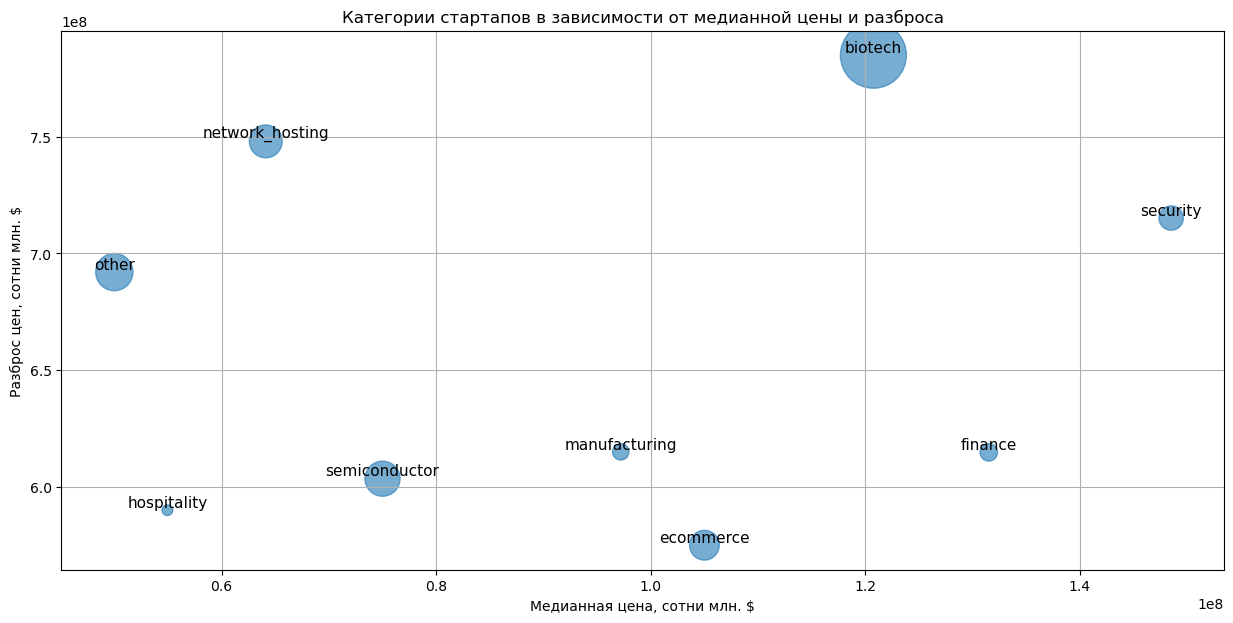

In [90]:
# Приводим значение столбцов к int64.
for col in ['Медиана', 'Размах']:
    common_categories[col] = common_categories[col].str.replace(',', '').astype('int64')


# Строим scatter plot.
# При помощи параметра s устанавливаем размер точек на графике.
plt.figure(figsize=(15, 7))
plt.scatter(
    common_categories['Медиана'],
    common_categories['Размах'],
    s=common_categories['Кол-во'] * 10,
    alpha=0.6
)

# Добавляем подписи категорий. 
# Перебираем индекс датафрейма при помощи enumerate.
# В методе text() испольуем i для получения доступа к столбцам 'Медиана' и 'Размах' определяя координаты точки на графике,
# и припомощи txt указываем наименование категории.
for i, txt in enumerate(common_categories.index):
    plt.text(
        common_categories['Медиана'].iloc[i],
        common_categories['Размах'].iloc[i],
        txt,
        fontsize=11,
        ha='center',
        va='bottom'
    )

plt.xlabel("Медианная цена, сотни млн. $")
plt.ylabel("Разброс цен, сотни млн. $")
plt.title("Категории стартапов в зависимости от медианной цены и разброса")
plt.grid(True)
plt.show()

- Для определения категорий стартапов с типично высокими ценами и наибольшим разбросом цен за стартап было построено две сводные таблицы: первая - отражает среднюю и медианную цену за один стартап по категориям, вторая - отражает размах цен в разрезе каждой из категорий, а также минимальную и максимальную цену за компанию.
- Было принято решение отобрать топ-20 категорий в каждой из таблиц для того чтобы было проще выделить категории стартапов подпадающие под оба условия (типичная высокая цена и наибольший разброс цен).
- Учитывая достаточно большой размах цен (range) данные первой таблицы (среднее, медиана) были отсортированы именно по медиане, поскольку она корректнее показывает типичное значение при неоднородности данных.
- Для расчёта размаха данные не фильтровались, за исключением нулевых значений, которые считаются явными аномалиями, чтобы показать реальный разброс цен в каждой категории.  
- Из категорий которые подпадают под условие задачи можно выделить следующие:
    - `biotech` (разброс цен: 784 891 000, медиана: 120 750 000, количество компаний: 226)
    - `security` (разброс цен: 715 150 000, медиана: 148 500 000, количество компаний: 31)
    - `ecommerce` (разброс цен: 574 999 989, медиана: 105 000 000, количество компаний: 46)
    - `finance` (разброс цен: 614 800 000, медиана: 131 500 000, количество компаний: 16)
    - `network_hosting` (разброс цен: 747 990 000, медиана: 64 115 000, количество компаний: 56)
    - `semiconductor` (разброс цен: 603 500 000, медиана: 75 000 000, количество компаний: 64)
- Категория `biotech` насчитывает 226 компаний, что значительно больше чем в других категориях, она является наиболее репрезентативной, в `security` (31 компания) и `ecommerce` (46 компаний) меньше чем в предыдущей категории, но также можно считать показательными, в `network_hosting` (56 компаний) и `semiconductor` (64 компании) высокий разброс цен, но относительно низкая медиана, в `finance` всего 16 компаний, несмотря на то, что категория является одной из лидирующий по медианной цене и размаху.
- В рамках текущего анализа значения цен (`price_amount`) превышающие значение 90-го процентиля были отечены как нереалистичные.
- Перечисленные категории находятся в топ-20 по обоим показателям и именно эти категории могут быть интересны инвесторам.


### 3.5. Сколько раундов продержится стартап перед покупкой

- В рамках анализа была изучена связь между количеством раундов финансирования стартапа и его текущим статусом.
- На основе данных столбца `funding_rounds` была оценена типичная длительность инвестиционного пути стартапов для разных статусов.
- Для каждой группы стартапов было рассчитано среднее количество раундов финансирования, после чего результаты были визуализированы на графике.
- На основании полученных данных сделаны выводы о различиях в инвестиционной динамике стартапов в зависимости от их статуса и о том, сколько раундов финансирования в среднем проходит стартап до момента покупки.

In [91]:
# Проверяем уникальные значения в столбце с количеством раундов.
list(companies_of_interest_df['funding_rounds'].unique())

[np.int64(3),
 np.int64(0),
 np.int64(1),
 np.int64(5),
 np.int64(2),
 np.int64(7),
 np.int64(4),
 np.int64(6),
 np.int64(8),
 np.int64(10),
 np.int64(9),
 np.int64(13),
 np.int64(11),
 np.int64(15),
 np.int64(14),
 np.int64(12)]

In [92]:
# Находим среднее значение количества раундов для каждой категории.
avg_rounds_by_status = companies_of_interest_df.groupby('status')['funding_rounds'].mean().sort_values(ascending=False)

In [93]:
# Выводим среднее количество раундов в виде таблицы.
avg_rounds_df = avg_rounds_by_status.reset_index()
avg_rounds_df.columns = ['Статус', 'Среднее количество раундов']
avg_rounds_df

,Статус,Среднее количество раундов
0,ipo,1.934375
1,operating,1.522658
2,closed,1.381453
3,acquired,0.523526


In [94]:
# Выводим медианное значение количества раундов.
mean_rounds_by_status = companies_of_interest_df.groupby('status')['funding_rounds'].median().sort_values(ascending=False)
mean_rounds_df = mean_rounds_by_status.reset_index()
mean_rounds_df.columns = ['Статус', 'Медианное количество раундов']
mean_rounds_df

,Статус,Медианное количество раундов
0,closed,1.0
1,ipo,1.0
2,operating,1.0
3,acquired,0.0


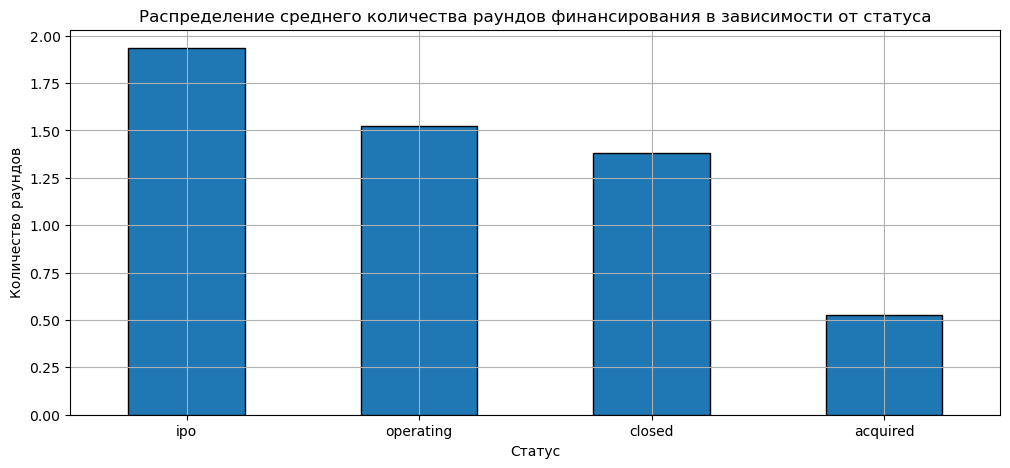

In [95]:
# Выводим график отражающий распределение среднего количества раундов финансирования по статусам.
avg_rounds_by_status.plot(kind='bar', 
                         rot=0,
                         grid=True,
                         edgecolor='black',
                         figsize=(12, 5),
                         xlabel='Статус',
                         ylabel='Количество раундов',
                         title='Распределение среднего количества раундов финансирования в зависимости от статуса')

plt.show()

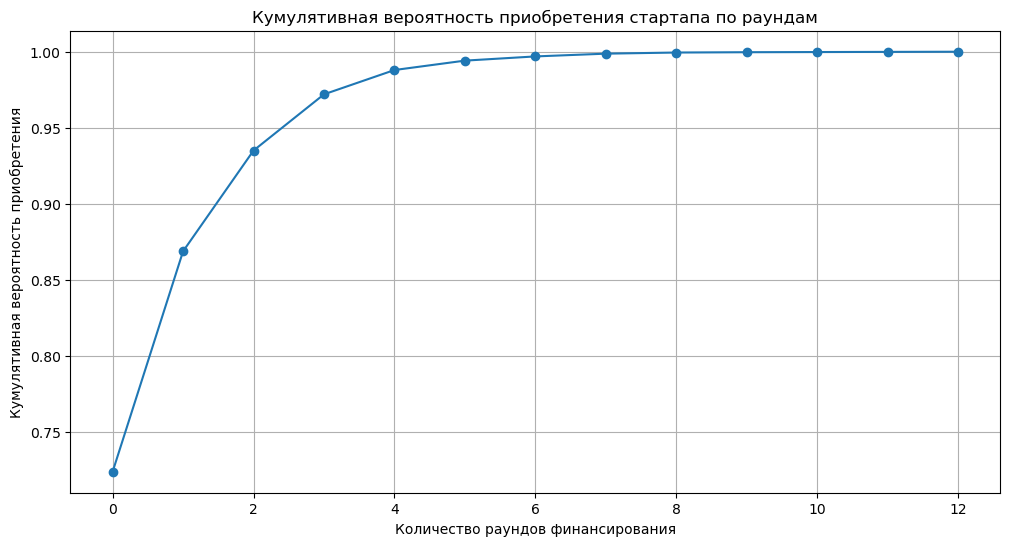

In [96]:
# Создаем датафрейм с компаниями со статусом acquired.
acquired_only = companies_of_interest_df[companies_of_interest_df['status'] == 'acquired']

# Группируем компании по кол-ву раундовфинансирования.
acquired_only_grpd = acquired_only.groupby('funding_rounds')['status'].count()

# Рассчтываем кумулятивную сумму, делим на общее кол-во купленных компаний для получения кумулятивное вероятности.
acquired_only_grpd_cum = acquired_only_grpd.cumsum() / acquired_only_grpd.sum()

# Строим график.
acquired_only_grpd_cum.plot(kind='line', 
                            marker='o',
                            xlabel='Количество раундов финансирования',
                            ylabel='Кумулятивная вероятность приобретения',
                            title='Кумулятивная вероятность приобретения стартапа по раундам',
                            grid=True,
                            figsize=(12, 6))

plt.show()

- График показывает что большинство приобретений происходит на ранних стадиях финансирования. Приблизительно 72% стартапов приобретаются не дойдя до первого раунда финансирования, ~87% - на первом раунде, ~94% - на втором. После третьего раунда кумулятивная вероятность близится к 100%, и стартапы приобретаются реже.

- Для анализа количества раундов финансирования стартапов по статусам использовалось среднее значение, так как оно позволяет наглядно сравнить группы на графике.
- Стартапы со статусом `ipo` (первичное публичное размещение) в среднем прошли около 1,9 раунда финансирования. Это значит, что эти компании получили несколько раундов инвестиций и уже вышли на биржу.
- Стартапы со статусом `operating` (действующие) в среднем прошли около 1,5 раунда. Многие компании уже получили один-два раунда инвестиций, но продолжают работать и ещё не проданы и не вышли на биржу.
- Стартапы со статусом `closed` (закрыты) в среднем прошли около 1,4 раунда. Эти компании перестали работать, и большинство из них получили один-два раунда до закрытия.
- Стартапы со статусом `acquired` (приобретенные) в среднем прошли около 0,5 раунда. Это говорит о том, что многие из этих стартапов были приобретены очень рано, иногда ещё до значительного финансирования.
- Если посмотреть на медиану, видно, что у большинства компаний с статусами `ipo`, `operating` и `closed` был всего один раунд, а у приобретённых стартапов (`acquired`) - нулевой. Это показывает, что среднее значение немного завышено из-за редких компаний с большим количеством раундов.


## Шаг 4. Итоговый вывод и рекомендации


***Проделанная работа:***
- В рамках знакомства с данными были загружены исходные датасеты. 
- Проведена проверка структуры и типов данных, а также исправлены ошибки:
    - Приведены наименования столбцов к единому стилю snake_case.
    - Столбцы с датами приведены к типу datetime, числовые дискретные и идентификаторы - к Int64.
    - Исправлены опечатки.
    - Проведен анализ пропусков.
- В блоке предобработки данных и предварительного исследования был проведен анализ на основе датасета company_and_rounds.csv.
    - Были определены типичный размер средств, выделяемых в рамках одного раунда, общее количество раундов финансирования по годам. Построена соответствующая визуализация, сделаны выводы.
    - Исследована информация об образовании сотрудников на основе столбцов people.csv и education.csv. Компании разделены на группы по количеству сотрудников, для каждой группы рассчитана средняя доля отсутствующей информации об образовании сотрудников, дана оценка полноте данных. 
    - Проведен анализ для ответа на вопрос, можно ли использовать столбец network_username (встречающийся в трех датафреймах) в качестве ключа для объединения данных. Сформирован вывод.
    - Датасет company_and_rounds.csv разделен на company_df и rounds_df для удобства анализа. Удалены дубликаты, проверены идентификаторы на уникальность, сохранена целостность данных. 
- В рамках исследовательского анализа объединённых таблиц был создан новый датафрейм companies_of_interest_df на основе датафрейма company_df. В выборку вошли компании у которых значения funding_rounds или investment_rounds больше нуля, или те, у которых в столбце status указано acquired. Столбец с наименованием компании и категорией были нормализованы, числовые данные проверены на отрицательные значения. Количество строк результирующего датафрейма соответствует требованиям в задании.
    - Проанализированы данные столбца funding_total, в данных удалены выбросы, построены соответствующие визуализации, определены типичные и выбивающиеся значения.
    - Исследованы компании, проданные за ноль или за один доллар. Найден экстремальный выброс, построены визуализации с учетом и без учета выброса. Выделены среднее и медианное значения выборки без выброса. Рассчитаны верхняя и нижняя границы выбросов столбца funding_total, определены соответствующие границам процентили. Построена визуализация для наглядности.
    - Определены типичные цены стартапов по категориям и размах цен. При помощи сводных таблицы выведены топ-15 по наивысшей медианной цене и топ-15 по наивысшему размаху цен. На основе полученных данных были выбраны компании попавшие в обе выборки, как наиболее интересные для инвесторов.
    - Исследованы значения столбца funding_rounds. Определены среднее и медианное значения количества раундов финансирования для каждого типа статуса стартапа. Построена соответствующая визуализация, сформированы выводы.

***Оценка полноты данных:***
- Для компаний, включённых в анализ (датафрейм companies_of_interest_df), ключевые столбцы (company_id, name, status, funding_rounds, funding_total) полностью заполнены. Столбец category_code содержит 13,3% пропусков, что нужно учитывать при анализе по категориям. В целом данные достаточны для выполнения всех задач проекта, включая анализ финансирования, статусов и категорий компаний.

***Основные выводы:***
- Выбор компаний для анализа
    - Были отобраны компании с раундами финансирования или инвестирования больше нуля, а также приобретённые (acquired).
    - Данные корректны, идентификаторы уникальны, числовые столбцы не содержат отрицательных значений.
    - Данных в выборке достаточно для построения выводов.
- Размер финансирования и выбросы
    - Среднее финансирование сильно выше медианы из-за редких крупных инвестиций.
    - Типичный размер финансирования для компании приблизительно 1,4 млн (медиана с учетом отсечения выбросов).
    - Значения выше 14,13 млн. считаются нетипичными.
    - Нулевые суммы финансирования при наличии раундов встречаются, но их можно считать исключениями.
- Продажа компаний за 0 и 1 доллар
    - Исследование компаний проданных за ноль или один доллар и с ненулевой суммой финансирования показало что все компании подпадающие под условия имеют статус acquired (приобретенные). В выборке с такими компаниями наблюдается правосторонняя ассиметрия, много выбивающихся значений и один экстремальный выброс (компания Clearwire). Медианное значение выборки без учета Clearwire составляет 6 млн., среднее - ~14.6 млн.
    - Верхняя граница выбросов столбца funding_total равна 50 025 000 (91.10 процентиль), то есть примерно 91,1% значения столбца funding_total ниже текущего значения. Нижняя граница выбросов рассчитана как отрицательная (ниже нуля), поэтому реальных нижних выбросов нет. Минимальное значение в выборке - 3 750. Большинство компаний имеют суммарное финансирование до ~50 млн долларов.
- Цены стартапов по категориям
    - Категории с высокими типичными ценами и большим разбросом цен потенциально интересны крупным инвесторам.
    - Анализ показал наиболее привлекательные категории: biotech, security, ecommerce, finance, network_hosting и semiconductor.
- Количество раундов перед покупкой
    - IPO и действующие компании в среднем проходят 1–2 раунда.
    - Приобретённые стартапы часто покупаются на ранней стадии (0–1 раунд).
    - Медиана показывает, что большинство компаний получают 1 раунд.

***Рекомендации:***


- Выбор компаний для инвестиций
    - Основной фокус стоит делать на стартапах с уже прошедшими хотя бы одним раундом финансирования, а также на компаниях, которые были приобретены (acquired).
    - Это позволит ориентироваться на компании с подтверждённой инвестиционной активностью и потенциалом для дальнейшей перепродажи.
- Оценка финансирования компаний
    - Медиана суммы финансирования для одной компании составляет около 1,4 млн (после отсечения выбросов).
    - Следует учитывать, что редкие крупные инвестиции сильно смещают средние показатели, поэтому при планировании лучше ориентироваться на медиану и распределение, а не на среднее.
- Категории стартапов с инвестиционной привлекательностью
    - Наиболее интересные сегменты для инвесторов: biotech, security, ecommerce, finance, network_hosting и semiconductor.
    - Эти категории характеризуются одновременно высокими медианными ценами и большим разбросом, что указывает на потенциал высокой доходности, но и повышенный риск.
- Стадии финансирования и планирование инвестиций
    - IPO и действующие компании обычно проходят 1–2 раунда финансирования, приобретённые компании часто поглощаются на ранней стадии (0–1 раунд).
    - Ранние инвестиции (0–1 раунд) несут больше неопределённости и риска, но при успешном исходе могут дать высокую доходность. Более зрелые компании (1–2 раунда и выше) считаются стабильнее, но потенциал роста у них ниже.
- Полнота данных
    - При выводах следует учитывать что в исходном датасете company_and_rounds присутствуют пропуски, поэтому при дальнейшем анализе на его базе следует учитывать это при нахождении типичных показателей, предпочтительнее использовать медианное значение.